<a href="https://colab.research.google.com/github/kimys0279/NCSU/blob/main/ECE763_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install google-colab 
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


Simple Gaussian

log_likelihood pdf face [ -40.27105681  -38.33485211  -40.06199023  -86.1827652   -50.15194555
  -25.74855677  -52.78388802  -66.59593766  -35.84684505  -53.16432274
  -70.34119768  -45.44344807 -107.38911688  -56.91002757  -30.17133561
  -58.04210637 -132.3578066   -51.22885197  -74.12354474  -89.89686232
  -61.77426313  -35.45716431  -46.9771339   -36.99258707  -41.51092355
  -71.07098775  -70.45369908 -102.96615092  -85.8851961   -82.5218739
  -81.89291994  -25.64365442  -30.8181107   -91.11776629  -46.6036819
  -17.86703655  -48.99798934 -115.75906838  -55.96063565  -81.21661074
  -47.69619858  -21.13786408  -61.10762072  -30.97267118  -62.29155236
  -58.88535512  -49.98153057  -57.71898072  -38.24739116  -22.77813634
  -99.64098792  -36.65176861  -48.87178963  -35.61264814  -53.53433663
  -43.9588414   -65.37368537  -30.03765129  -60.17132301  -60.89267652
  -95.6037639   -88.19060393  -60.39200364 -130.60166949  -82.7815861
  -75.06927636  -44.88286038  -40.73731414  -54.45776478

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


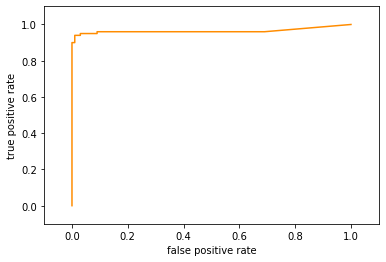

In [ ]:
import cv2
import os, os.path
from random import *
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from pylab import *
from numpy.linalg import inv
from sklearn.metrics import roc_curve

# ##############################################################################
# Read training and test dataset

def path(n):
    if n == 1:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_face"
    elif n==2:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_non"
    elif n==3:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_face"
    else:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_non"

    image_path_list_face = []
    valid_image_extensions = [".jpg"] #specify your vald extensions here
    valid_image_extensions = [item.lower() for item in valid_image_extensions]

    image_list_face = []
    for root, dirs, files in os.walk(imageDir_face):
        for file in files:
            with open(os.path.join(root, file), "r") as auto:
                extension = os.path.splitext(file)[1]
                if extension.lower() not in valid_image_extensions:
                    continue
                image_list_face.append(os.path.join(root, file))

    flattened_space_face = []
    for imagePath in image_list_face:
        image = cv2.imread(imagePath)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        flattened = image_gray.flatten()
        flattened_space_face.append(flattened)
    return flattened_space_face

# ##############################################################################
# Calculate Mean and Covariance

def parameters(flattened_space_face):
    Mean = np.mean(flattened_space_face, axis=0)
    Cov = np.cov(np.transpose(flattened_space_face))
    return Mean, Cov

# ##############################################################################
# Calculate Norm (log likelihood)

def Norm(flattened_space_test, Cov, Mean):
    log_pdf = np.zeros(len(flattened_space_test))
    for i in range(len(flattened_space_test)):
        d = np.matmul((flattened_space_test[i] - Mean),(inv(Cov)))
        #print d_face
        d1 = np.matmul(d,((flattened_space_test[i] - Mean).transpose()))
        #print d1_face
        pdf = np.exp(-0.5*d1)
        log_pdf[i] = np.log(pdf)
    print ("log_likelihood pdf face", log_pdf)
    return log_pdf

# ##############################################################################
# Calculate Posterior

def Posterior(test_face, test_non):
    Posterior_face = test_face/(test_face + test_non)
    Posterior_non = test_non/(test_face + test_non)
    return Posterior_face, Posterior_non

# #############################################################################
# -----------------------------------------------------------------------------

flattened_space_face = path(1)
flattened_space_non = path(2)
flattened_space_test_face = path(3)
flattened_space_test_non = path(4)

Mean_face, Cov_face = parameters(flattened_space_face)
Mean_non, Cov_non = parameters(flattened_space_non)

Mean_show=np.reshape(Mean_face,(10,10))
cv2.imwrite('Mean_single_gaussian_face.jpg', Mean_show)

Mean_show_non=np.reshape(Mean_non,(10,10))
cv2.imwrite('Mean_single_gaussian_nonface.jpg', Mean_show_non)

cv2.imwrite('Cov_single_gaussian_face.jpg', Cov_face)
cv2.imwrite('Cov_single_gaussian_nonface.jpg', Cov_non)

log_pdf_face_wrt_face = Norm(flattened_space_test_face, Cov_face, Mean_face)
log_pdf_non_wrt_face = Norm(flattened_space_test_non, Cov_face, Mean_face)

log_pdf_face_wrt_non = Norm(flattened_space_test_face, Cov_non, Mean_non)
log_pdf_non_wrt_non = Norm(flattened_space_test_non, Cov_non, Mean_non)

Posterior_testface_face, Posterior_testface_non  = Posterior(log_pdf_face_wrt_face, log_pdf_face_wrt_non)
Posterior_testnon_face, Posterior_testnon_non  = Posterior(log_pdf_non_wrt_face, log_pdf_non_wrt_non)

count = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_face[i]> Posterior_testface_non[i]:
        count=count+1
#print "count: ", count

count1 = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_non[i]> Posterior_testnon_face[i]:
        count1=count1+1
#print "count1: ", count1

count_false_positive = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_face[i]> 0.5:
        count_false_positive=count_false_positive+1
print ("False Positive Rate ", float(count_false_positive)/len(Posterior_testface_face))

count_false_negative = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_non[i]> 0.5:
        count_false_negative=count_false_negative+1
print ("False Negative Rate ", float(count_false_negative)/len(Posterior_testface_face))

misclassification = (float(count_false_positive + count_false_negative))/ (len(Posterior_testface_face) + len(Posterior_testface_face))
print ("Misclassification Rate", misclassification)

Posterior = np.append( Posterior_testface_face, Posterior_testnon_face)
labels = np.append(np.ones(100), np.zeros(100)   )

# ##############################################################################
# PLot ROC Curve

fpr, tpr, _ = roc_curve(labels, Posterior, pos_label=0)
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()


Mixed Gaussian

iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
mean: [[ 33.93199373  46.82453415 135.98001523 202.91479276 235.87068656
  235.25458913 200.62483298 112.23633084  35.75719288  16.92070508
   32.90760076  57.5611631  157.40661728 225.10032366 255.
  251.06707049 216.43970998 134.20662365  38.86103812  15.19502743
   33.37986487  60.25357721 154.45484643 215.51645439 239.82159209
  239.13928851 208.00062715 132.82186309  38.14574333  12.21039544
   30.19017959  52.8345295  151.58514247 161.52096662 181.44244014
  186.21275042 153.00484015 134.77594643  40.1617006    7.62659852
   30.22695207  58.1536114  162.30203603 125.90198759 154.48384878
  162.52712395 127.60245659 132.21034386  53.8281264    7.06930254
   32.64146678  79.98186628 188.55450888 190.5311643  194.7273553
  199.07519768 193.06478232 180.13091695  67.71877385   7.0780248
   25.15651016  86.16675837 185.1900104  221.01312416 205.13907413
  194.1546421  210.28109038 176.1712416   7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: RuntimeWarning: invalid value encountered in true_divide


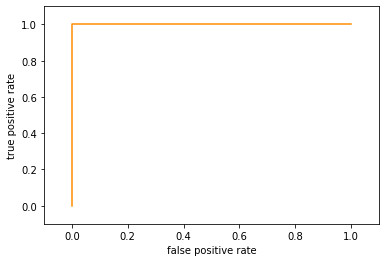

In [ ]:
import cv2
import os, os.path
from random import *
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from pylab import *
from numpy.linalg import inv
from sklearn.metrics import roc_curve

# ##############################################################################
# Read training and test dataset

def path(n):

    if n == 1:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_face"
    elif n==2:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_non"
    elif n==3:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_face"
    else:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_non"

    image_path_list_face = []
    valid_image_extensions = [".jpg"] #specify your vald extensions here
    valid_image_extensions = [item.lower() for item in valid_image_extensions]

    image_list_face = []

    for root, dirs, files in os.walk(imageDir_face):
        for file in files:
            with open(os.path.join(root, file), "r") as auto:
                extension = os.path.splitext(file)[1]
                if extension.lower() not in valid_image_extensions:
                    continue
                image_list_face.append(os.path.join(root, file))

    flattened_space_face = []
    for imagePath in image_list_face:
    #            print 'k: ', k
        image = cv2.imread(imagePath)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        flattened = image_gray.flatten()
        flattened_space_face.append(flattened)
    return flattened_space_face

# ##############################################################################
# Initial Parameters

def Initial_parameters(N_clusters):

    lamda = np.zeros(N_clusters)
    for i in range(N_clusters):
        lamda[i]=1./N_clusters

    Mean = np.random.randint(0,255, size=(N_clusters, 100))

    Cov=np.zeros((100,100,N_clusters))
    for i in range(N_clusters):
        for j in range(100):
            for k in range(100):
                if j==k:
                    Cov[j][k][i]=int((np.random.random())+(1000*(2)))
                else:
                    Cov[j][k][i]=0

    return lamda, Mean, Cov

# ##############################################################################
# E-M Algorithm

def Estep( N_clusters, flattened_space_face, lamda, Mean, Cov):

    pdf = np.zeros((len(flattened_space_face), N_clusters))
    sum_pdf = np.zeros(len(flattened_space_face))
    for i in range (len(flattened_space_face)):
        for k in range (N_clusters):
            d = np.matmul((flattened_space_face[i] - Mean[k]),(inv(Cov[:,:,k])))
            d1 = np.matmul(d,((flattened_space_face[i] - Mean[k]).transpose()))
            pdf[i][k] =  lamda[k]*exp(-0.5*d1)
        sum_pdf[i] = np.sum(pdf[i])

    r = np.zeros((len(flattened_space_face), N_clusters))
    for i in range(len(flattened_space_face)):
        for j in range(N_clusters):
            r[i][j] = pdf[i][j]/sum_pdf[i]

    r_temp = np.zeros(N_clusters)
    for i in range(N_clusters):
        r_temp[i]=np.sum(r[:,i])
    return r, r_temp

def Mstep(N_clusters, r, r_temp, flattened_space_face ):

    new_lamda = np.zeros(N_clusters)
    for i in range(N_clusters):
        new_lamda[i] = r_temp[i]/np.sum(r_temp)

    r_t=r.transpose()
    new_mean = np.zeros((N_clusters, 100))
    new_mean_temp = np.zeros((len(flattened_space_face),100))
    for i in range (N_clusters):
        for j in range(len(flattened_space_face)):
            for k in range(100):
                new_mean_temp[j][k] = r_t[i][j]*flattened_space_face[j][k]

        for j in range(100):
           new_mean[i][j] = np.sum(new_mean_temp[:,j])

    New_Cov=np.zeros((100,100,N_clusters))
    for i in range(N_clusters):
        temp1 = np.zeros((len(flattened_space_face),100))
        temp2 = np.zeros((len(flattened_space_face),100))
        temp1_1 = np.zeros((100,1))
        temp2_2 = np.zeros((100,1))
        for j in range(len(flattened_space_face)):
            temp1[j] = (flattened_space_face[j] - new_mean[i])
            temp2[j] = temp1[j]*r[j][i]
        for k in range(100):
            temp1_1[k] = np.sum(temp1[:,k])
            temp2_2[k] = np.sum(temp2[:,k])
        new_cov_temp=np.matmul(temp1_1,(temp2_2).transpose())
        New_Cov[:,:,i]=new_cov_temp/np.sum(r_temp[i])
    Cov1=np.zeros((100, 100,N_clusters))
    for j in range(N_clusters):
        for i in range(100):
            for k in range(100):
                if i==k:
                    Cov1[i][k][j] = (((New_Cov[i][k][j] - np.min(New_Cov[:,:,j]))/ (np.max(New_Cov[:,:,j])-np.min(New_Cov[:,:,j])))+10*1000)
                else:
                    Cov1[i][k][j] = 0
    Mean1=np.zeros((N_clusters, 100))
    for j in range(N_clusters):
        for i in range(100):
            Mean1[j][i] = ((new_mean[j][i] - np.min(new_mean[j,:]))/ (np.max(new_mean[j,:])-np.min(new_mean[j,:])))*255#

    lamda = new_lamda
    Mean = Mean1
    Cov = Cov1

    return new_lamda, Mean1, Cov1

# ##############################################################################
# Calculate Norm (log likelihood)

def Norm( N_clusters, flattened_space_test, lamda, Mean, Cov):

    pdf = np.zeros((len(flattened_space_test), N_clusters))
    sum_pdf = np.zeros(len(flattened_space_test))
    for i in range (len(flattened_space_test)):
        for k in range (N_clusters):
            d = np.matmul((flattened_space_test[i] - Mean[k]),(inv(Cov[:,:,k])))
            d1 = np.matmul(d,((flattened_space_test[i] - Mean[k]).transpose()))
            pdf[i][k] =  lamda[k]*exp(-0.5*d1)
        sum_pdf[i] = np.sum(pdf[i])
    return  sum_pdf

def Posterior(test_face, test_non):
    Posterior_face = test_face/(test_face + test_non)
    Posterior_non = test_non/(test_face + test_non)
    return Posterior_face, Posterior_non


# #############################################################################
# -----------------------------------------------------------------------------

N_clusters = 3
iteration = 10
flattened_space_face = path(1)
flattened_space_non = path(2)
flattened_space_test_face = path(3)
flattened_space_test_non = path(4)

lamda_face, Mean_face, Cov_face = Initial_parameters(N_clusters)
lamda_non, Mean_non, Cov_non = Initial_parameters(N_clusters)


for iter in range(iteration):
    if iter < iteration:
        print ("iter: ", iter)
        r, r_temp = Estep( N_clusters, flattened_space_face, lamda_face, Mean_face, Cov_face)
        lamda_face, Mean_face, Cov_face = Mstep(N_clusters, r, r_temp, flattened_space_face )

        r_non, r_non_temp = Estep( N_clusters, flattened_space_non, lamda_non, Mean_non, Cov_non)
        lamda_non, Mean_non, Cov_non = Mstep(N_clusters, r_non, r_non_temp, flattened_space_non )

print ("mean:", Mean_face)

for i in range(N_clusters):
    Mean_show=np.reshape(Mean_face[i],(10,10))
    cv2.imwrite('Mean_MixtureGaussian_face_'+str(i)+'.jpg',Mean_show)

for i in range(N_clusters):
    Mean_show_non=np.reshape(Mean_non[i],(10,10))
    cv2.imwrite('Mean_MixtureGaussian_non_'+str(i)+'.jpg',Mean_show_non)

for i in range(N_clusters):
    cv2.imwrite('Cov_MixtureGaussian_face_'+str(i)+'.jpg',Cov_face)

for i in range(N_clusters):
    cv2.imwrite('Cov_MixtureGaussian_non_'+str(i)+'.jpg',Cov_non)


log_pdf_face_wrt_face = Norm(N_clusters, flattened_space_test_face, lamda_face, Mean_face, Cov_face)
log_pdf_non_wrt_face = Norm(N_clusters, flattened_space_test_non, lamda_face, Mean_face, Cov_face)

log_pdf_face_wrt_non = Norm(N_clusters, flattened_space_test_face, lamda_non, Mean_non, Cov_non)
log_pdf_face_wrt_face = Norm(N_clusters, flattened_space_test_non, lamda_non, Mean_non, Cov_non)


Posterior_testface_face, Posterior_testface_non  = Posterior(log_pdf_face_wrt_face, log_pdf_face_wrt_non)
Posterior_testnon_face, Posterior_testnon_non  = Posterior(log_pdf_non_wrt_face, log_pdf_non_wrt_non)

count = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_face[i]> Posterior_testface_non[i]:
        count=count+1

count1 = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_non[i]> Posterior_testnon_face[i]:
        count1=count1+1

count_false_positive = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_face[i]> 0.5:
        count_false_positive=count_false_positive+1
print ("False Positive Rate ", float(count_false_positive)/100)

count_false_negative = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_non[i]> 0.5:
        count_false_negative = count_false_negative + 1
print ("False Negative Rate ", float(count_false_negative)/100)

misclassification = (float(count_false_positive + count_false_negative)) / (len(Posterior_testface_face) + len(Posterior_testface_face))
print ("Misclassification Rate", misclassification)

Posterior = np.append(   Posterior_testface_face, (Posterior_testnon_face))
labels = np.append(np.ones(100), np.zeros(100)   )

# ##############################################################################
# PLot ROC Curve

fpr, tpr, _ = roc_curve(labels, Posterior, pos_label=1)
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

T Distribution

initial Cov face: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
initial Cov non face: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
iter:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


Optimization terminated successfully.
         Current function value: -4588.573561
         Iterations: 33
         Function evaluations: 66
v: 0.30841827392578125
Optimization terminated successfully.
         Current function value: -4678.169639
         Iterations: 33
         Function evaluations: 66
non v: 0.30384063720703125
iter:  1
Optimization terminated successfully.
         Current function value: 1618.961457
         Iterations: 18
         Function evaluations: 36
v: 1.0136238858103752
Optimization terminated successfully.
         Current function value: 9040.307777
         Iterations: 16
         Function evaluations: 32
non v: 0.022016577422618866
iter:  2
Optimization terminated successfully.
         Current function value: 7809.801607
         Iterations: 20
         Function evaluations: 40
v: 0.048948926907542045
Optimization terminated successfully.
         Current function value: 9984.410837
         Iterations: 13
         Function evaluations: 26
non v: 0.0

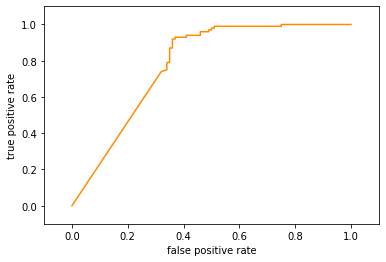

In [ ]:
import cv2
import os, os.path
from random import *
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from pylab import *
from numpy.linalg import inv
import scipy
from scipy import optimize
from sklearn.metrics import roc_curve

# ##############################################################################
# Read training and test dataset

def path(n):

    if n == 1:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_face"
    elif n==2:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_non"
    elif n==3:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_face"
    else:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_non"

    image_path_list_face = []
    valid_image_extensions = [".jpg"] #specify your vald extensions here
    valid_image_extensions = [item.lower() for item in valid_image_extensions]

    image_list_face = []

    for root, dirs, files in os.walk(imageDir_face):
        for file in files:
            with open(os.path.join(root, file), "r") as auto:
                extension = os.path.splitext(file)[1]
                if extension.lower() not in valid_image_extensions:
                    continue
                image_list_face.append(os.path.join(root, file))

    flattened_space_face = []
    for imagePath in image_list_face:
        image = cv2.imread(imagePath)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        flattened = image_gray.flatten()
        flattened_space_face.append(flattened)
    return flattened_space_face


def Initial_parameters():

    Mean = np.random.randint(0,255, size=(1, 100))
    #print "initial mean:", Mean
    Cov=np.zeros((100,100))
    for j in range(100):
        for k in range(100):
            if j==k:
                Cov[j][k]=int((np.random.random()))
            else:
                Cov[j][k]=0
    Cov = Cov + 1*np.eye(100)
    v = 300
    D = 100
    return  Mean, Cov, v, D


def Estep( flattened_space_face, Mean, Cov, v, D):
    t=len(flattened_space_face)


    expectation_h = np.zeros(t)
    expectation_logh = np.zeros(t)
    d1 = np.zeros(t)

    for i in range(t):
        d = np.matmul((flattened_space_face[i] - Mean),(inv(Cov[:,:])))
        d1[i] = np.matmul(d,((flattened_space_face[i] - Mean).transpose()))
        expectation_h[i]=(v+D)/(v+d1[i])
        expectation_logh[i] = scipy.special.digamma(((v/2) + (D/2)), out=None) - np.log((v/2) + (d1[i]/2))

    return expectation_h, expectation_logh, d1

def Mstep(expectation_h, expectation_logh,  flattened_space_face, v ):
    t=len(flattened_space_face)
    return new_Mean, new_Cov, new_v

def Norm(flattened_space_face, Mean, Cov, v, D):
    d1 = np.zeros(len(flattened_space_face))
    final_test = np.zeros(len(flattened_space_face))
    for i in range(len(flattened_space_face)):
        d = np.matmul((flattened_space_face[i] - Mean),(inv(Cov[:,:])))
        d1[i] = np.matmul(d,((flattened_space_face[i] - Mean).transpose()))
        final_test[i] = (scipy.special.gamma((v+D)/2) * ((1 + (d1[i]/v))**(-(v+D)/2)))/scipy.special.gamma(v/2)
    return final_test

def Posterior(test_face, test_non):
    Posterior_face = test_face/(test_face + test_non)
    Posterior_non = test_non/(test_face + test_non)
    return Posterior_face, Posterior_non
# #############################################################################
# -----------------------------------------------------------------------------

iteration = 7
flattened_space_face = path(1)
flattened_space_non = path(2)
flattened_space_test_face = path(3)
flattened_space_test_non = path(4)

Mean, Cov, v, D = Initial_parameters()
Mean_non, Cov_non, v_non, D_non = Initial_parameters()
print ("initial Cov face:", Cov)
print ("initial Cov non face:", Cov_non)

for iter in range(iteration):
    if iter < iteration:
        print ("iter: ", iter)
        expectation_h, expectation_logh, d1 = Estep(flattened_space_face, Mean, Cov, v, D)
        Mean, Cov, v = Mstep(expectation_h, expectation_logh,  flattened_space_face, v )
        print ("v:", v)

        expectation_h_non, expectation_logh_non, d1_non = Estep(flattened_space_non, Mean_non, Cov_non, v_non, D_non)
        Mean_non, Cov_non, v_non = Mstep(expectation_h_non, expectation_logh_non,  flattened_space_non, v_non )
        print ("non v:", v_non)

print ("minimum v value", v)
print ("new Mean", Mean)
print ("new cov", Cov)

print ("minimum v non value", v_non)
print ("new Mean non ", Mean_non)
print ("new cov non", Cov_non)

Mean_face_show=np.reshape(Mean,(10,10))
cv2.imwrite('Mean_face_t-distribution.jpg', Mean_face_show)

Mean_non_face_show=np.reshape(Mean_non,(10,10))
cv2.imwrite('Mean_nonface_t-distribution.jpg', Mean_non_face_show)


cv2.imwrite('Cov_face_tdist_'+str(i)+'.jpg',Cov)

cv2.imwrite('Cov_nonface_tdist_'+str(i)+'.jpg',Cov_non)


# #############################################################################
log_pdf_Testface_wrt_face =  Norm(flattened_space_test_face, Mean, Cov, v, D)
log_pdf_Testface_wrt_non =  Norm(flattened_space_test_face, Mean_non, Cov_non, v_non, D_non)

log_pdf_Testnon_wrt_face =  Norm(flattened_space_test_non, Mean, Cov, v, D)
log_pdf_Testnon_wrt_non =  Norm(flattened_space_test_non, Mean_non, Cov_non, v_non, D_non)


# #############################################################################


Posterior_testface_face, Posterior_testface_non  = Posterior(log_pdf_Testface_wrt_face, log_pdf_Testface_wrt_non)
Posterior_testnon_face, Posterior_testnon_non  = Posterior(log_pdf_Testnon_wrt_face, log_pdf_Testnon_wrt_non)

count = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_face[i]> Posterior_testface_non[i]:
        count=count+1
print ("count of positively classified faces: ", count)


count1 = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_non[i]> Posterior_testnon_face[i]:
        count1=count1+1
print ("count of positively classified non-faces: ", count1)



count_false_positive = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_face[i]> 0.5:
        count_false_positive=count_false_positive+1
print ("False Positive Rate ", float(count_false_positive)/100)


count_false_negative = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_non[i]> 0.5:
        count_false_negative = count_false_negative + 1
print ("False Negative Rate ", float(count_false_negative)/100)

misclassification = (float(count_false_positive + count_false_negative)) / (len(Posterior_testface_face) + len(Posterior_testface_face))
print ("Misclassification Rate", misclassification)

Posterior = np.append(   Posterior_testface_face, (Posterior_testnon_face))
labels = np.append(np.ones(100), np.zeros(100)   )

# ##############################################################################
# PLot ROC Curve

fpr, tpr, _ = roc_curve(labels, Posterior, pos_label=1)
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

Factor Analyzer

initial phi [[0.57084939 0.08820797 0.25657276 0.84579696 0.02016367]
 [0.95442685 0.73169086 0.87371322 0.63362684 0.42608283]
 [0.90234731 0.92924813 0.1514353  0.85243878 0.60020894]
 [0.46434163 0.13030177 0.72044749 0.99082313 0.55244554]
 [0.73294572 0.08961199 0.11328276 0.46064498 0.54970522]
 [0.57514223 0.52947285 0.06010376 0.26503142 0.64361927]
 [0.39738561 0.10659225 0.57609989 0.01780284 0.99305607]
 [0.25946589 0.60634425 0.11261943 0.95111421 0.97088295]
 [0.37937853 0.40105926 0.19738231 0.38854836 0.49530229]
 [0.82329548 0.95210693 0.4705986  0.17669022 0.95474494]
 [0.12010508 0.50771899 0.35611298 0.12403208 0.55638534]
 [0.08515362 0.49487693 0.79422374 0.2488273  0.86052706]
 [0.19770848 0.17767531 0.09877041 0.45843164 0.29256584]
 [0.42803092 0.46058889 0.73771662 0.19785057 0.05965003]
 [0.139341   0.38038384 0.64352934 0.51919927 0.98428145]
 [0.65044292 0.83280257 0.38089581 0.71638158 0.47043948]
 [0.16818448 0.77065632 0.16674104 0.42457571 0.82458508]
 [

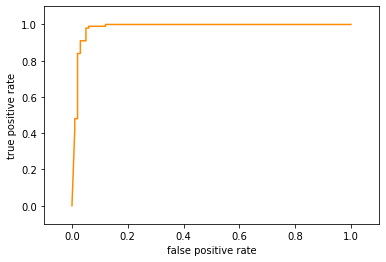

In [ ]:
import cv2
import os, os.path
from random import *
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from pylab import *
from numpy.linalg import inv
from sklearn.metrics import roc_curve
# #############################################################################
# #############################################################################

def path(n):

    if n == 1:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_face"
    elif n==2:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_non"
    elif n==3:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_face"
    else:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_non"

    #imageDir_face = "train_face" #specify your path here
    image_path_list_face = []
    valid_image_extensions = [".jpg"] #specify your vald extensions here
    valid_image_extensions = [item.lower() for item in valid_image_extensions]

    image_list_face = []

    for root, dirs, files in os.walk(imageDir_face):
        for file in files:
            with open(os.path.join(root, file), "r") as auto:
                extension = os.path.splitext(file)[1]
                if extension.lower() not in valid_image_extensions:
                    continue
                image_list_face.append(os.path.join(root, file))

    flattened_space_face = []
    for imagePath in image_list_face:
    #            print 'k: ', k
        image = cv2.imread(imagePath)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        flattened = image_gray.flatten()
        flattened_space_face.append(flattened)
    return flattened_space_face

# #############################################################################
# #############################################################################

def Initial_parameters(flattened_space_face, k):

    Mean = np.mean(flattened_space_face, axis=0)
    Cov = np.diag(np.diag(np.cov(np.transpose(flattened_space_face))))
    phi = np.random.random_sample((100, k))

    return Mean, Cov, phi

# #############################################################################
# #############################################################################

def Estep( k, flattened_space_face, phi, Mean, Cov):

    expectation_h = np.zeros((k, len(flattened_space_face)))
    expectation_h_ht = np.zeros((k,k, len(flattened_space_face)))
    a = np.zeros((k,k,len( flattened_space_face)))

    for i in range(len(flattened_space_face)):
        temp1 = np.matmul(phi.transpose(),inv(Cov))
        temp2 = np.matmul(temp1,phi) + np.eye(k)
        temp3 = np.matmul(np.matmul(inv(temp2),phi.transpose()), inv(Cov))
        expectation_h[:,i] = np.matmul(temp3, ((flattened_space_face[i]- Mean).transpose()))
        a[:,:,i] = expectation_h[:,i]*(expectation_h[:,i][np.newaxis]).transpose()
        expectation_h_ht[:,:,i] = inv(temp2) + a[:,:,i]

    return expectation_h, expectation_h_ht

# #############################################################################
# #############################################################################

def Mstep(k,expectation_h, expectation_h_ht,Mean, flattened_space_face ):

    sum_expectation = np.sum(expectation_h_ht, axis=2)

    y = np.zeros((100,k,len(flattened_space_face)))
    for i in range(len(flattened_space_face)):
        y[:,:,i] = np.matmul((flattened_space_face[i]-Mean)[np.newaxis].transpose(), (expectation_h[:,i][np.newaxis]))

    new_phi = np.matmul((np.sum(y,axis=2)),inv(sum_expectation))

    z = np.zeros((100,100,len(flattened_space_face)))
    for i in range(len(flattened_space_face)):
        b = (flattened_space_face[i]-Mean)[np.newaxis]
        z_temp = np.matmul(new_phi, expectation_h[:,i])
        z_temp2 = np.matmul(z_temp[np.newaxis].transpose(),b)
        z[:,:,i] = b*b.transpose()-z_temp2

    Cov_temp = np.sum(z,axis=2)
    new_Cov = Cov_temp/(len(flattened_space_face))

    phi = new_phi
    Cov = new_Cov+(1000*np.eye(100))

    return phi, Cov

# #############################################################################
# #############################################################################


def Norm(flattened_space_test, Cov, Mean):

    Cov_total = np.matmul(phi,phi.transpose()) + Cov
    pdf = np.zeros(len(flattened_space_test))
    log_pdf = np.zeros(len(flattened_space_test))
    for i in range(len(flattened_space_test)):
        d = np.matmul((flattened_space_test[i] - Mean),(inv(Cov_total)))
        #print d_face
        d1 = np.matmul(d,((flattened_space_test[i] - Mean).transpose()))
        #print d1_face
        pdf[i] = np.exp(-0.5*d1)
#        log_pdf[i] = np.log(pdf)
        #print log_pdf
    return pdf

def Posterior(test_face, test_non):
    Posterior_face = test_face/(test_face + test_non)
    Posterior_non = test_non/(test_face + test_non)
    return Posterior_face, Posterior_non
# ################################################
# #############################################################################
# #############################################################################

iteration = 20
k=5

flattened_space_face = path(1)
flattened_space_non = path(2)
flattened_space_test_face = path(3)
flattened_space_test_non = path(4)


Mean, Cov, phi = Initial_parameters(flattened_space_face, k)
Mean_non, Cov_non, phi_non = Initial_parameters(flattened_space_non, k)

print ("initial phi", phi)

for iter in range(iteration):
    if iter < iteration:
        print ("iter: ", iter)
        expectation_h, expectation_h_ht = Estep( k, flattened_space_face, phi, Mean, Cov)
        phi, Cov = Mstep(k,expectation_h, expectation_h_ht,Mean, flattened_space_face )

        expectation_h_non, expectation_h_ht_non = Estep( k, flattened_space_non, phi, Mean, Cov)
        phi_non, Cov_non = Mstep(k,expectation_h_non, expectation_h_ht_non,Mean_non, flattened_space_non )


log_pdf_Testface_wrt_face =  Norm(flattened_space_test_face, Cov, Mean)
log_pdf_Testface_wrt_non =  Norm(flattened_space_test_face, Cov_non, Mean_non)

log_pdf_Testnon_wrt_face =  Norm(flattened_space_test_non, Cov, Mean)
log_pdf_Testnon_wrt_non =  Norm(flattened_space_test_non, Cov_non, Mean_non)


# #############################################################################


Mean_show=np.reshape(Mean,(10,10))
cv2.imwrite('Mean_FA_face.jpg',Mean_show)

Mean_show_non=np.reshape(Mean_non,(10,10))
cv2.imwrite('Mean_FA_non.jpg',Mean_show_non)

cv2.imwrite('Cov_FA_face.jpg',Cov)

cv2.imwrite('Cov_FA_non.jpg',Cov_non)

Posterior_testface_face, Posterior_testface_non  = Posterior(log_pdf_Testface_wrt_face, log_pdf_Testface_wrt_non)
Posterior_testnon_face, Posterior_testnon_non  = Posterior(log_pdf_Testnon_wrt_face, log_pdf_Testnon_wrt_non)

count = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_face[i]> Posterior_testface_non[i]:
        count=count+1
print ("count of positively classified faces: ", count)


count1 = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_non[i]> Posterior_testnon_face[i]:
        count1=count1+1
print ("count of positively classified non-faces: ", count1)


count_false_positive = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_face[i]> 0.5:
        count_false_positive=count_false_positive+1
print ("False Positive Rate ", float(count_false_positive)/100)


count_false_negative = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_non[i]> 0.5:
        count_false_negative = count_false_negative + 1
print ("False Negative Rate ", float(count_false_negative)/100)

misclassification = (float(count_false_positive + count_false_negative)) / (len(Posterior_testface_face) + len(Posterior_testface_face))
print ("Misclassification Rate", misclassification)


Posterior = np.append(   Posterior_testface_face, (Posterior_testnon_face))
labels = np.append(np.ones(100), np.zeros(100)   )

# ##############################################################################
# PLot ROC Curve

fpr, tpr, _ = roc_curve(labels, Posterior, pos_label=1)
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

Mixed T Distribution

iter:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in multiply


Optimization terminated successfully.
         Current function value: -374.906361
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -346.254830
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -294.087438
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -439.944636
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -469.646525
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -436.300807
         Iterations: 28
         Function evaluations: 56
iter:  1
Optimization terminated successfully.
         Current function value: -951.884926
         Iterations: 29
         Function evaluations: 58
Opti

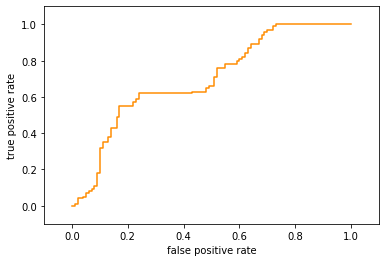

In [ ]:
import cv2
import os, os.path
from random import *
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from pylab import *
from numpy.linalg import inv
from sklearn.metrics import roc_curve
import scipy
from scipy import optimize
# #############################################################################
# #############################################################################

def path(n):

    if n == 1:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_face"
    elif n == 2:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/train_non"
    elif n == 3:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_face"
    else:
        imageDir_face = "/content/gdrive/MyDrive/Work/ECE763/Dataset/test_non"

    #imageDir_face = "train_face" #specify your path here
    image_path_list_face = []
    valid_image_extensions = [".jpg"] #specify your vald extensions here
    valid_image_extensions = [item.lower() for item in valid_image_extensions]

    image_list_face = []

    for root, dirs, files in os.walk(imageDir_face):
        for file in files:
            with open(os.path.join(root, file), "r") as auto:
                extension = os.path.splitext(file)[1]
                if extension.lower() not in valid_image_extensions:
                    continue
                image_list_face.append(os.path.join(root, file))

    flattened_space_face = []
    for imagePath in image_list_face:
    #            print 'k: ', k
        image = cv2.imread(imagePath)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        flattened = image_gray.flatten()
        flattened_space_face.append(flattened)
    return flattened_space_face

# #############################################################################
# #############################################################################

def Initial_parameters(flattened_space_face, clusters):
    lamda = np.zeros(clusters)
    v = np.random.randint(100,200, size=clusters)
    Mean = np.random.randint(0,255, size=(clusters, 100))
    #    print "initial mean:", Mean

    Cov=np.zeros((100,100,clusters))
    for i in range(clusters):
        for j in range(100):
            for k in range(100):
                if j==k:
                    Cov[j][k][i]=int((np.random.random())+(1000))
                else:
                    Cov[j][k][i]=0

    return Mean, Cov, lamda, v

# #############################################################################
# #############################################################################

def Estep( clusters, flattened_space_face, D, Mean, Cov, v):

    t=len(flattened_space_face)
    #flattened_space_face = np.asarray(flattened_space_face)
    expectation_h = np.zeros((t,clusters))
    expectation_logh = np.zeros((t,clusters))
    norm_func = np.zeros((t,clusters))
    responsibility = np.zeros((t,clusters))
    d1 = np.zeros((t, clusters))
    d2 = np.zeros((t, clusters))

    for i in range(t):
        for j in range(clusters):
            d = np.matmul((flattened_space_face[i] - Mean[j,:]),(inv(Cov[:,:,j])))
            d1[i][j] = np.matmul(d,((flattened_space_face[i] - Mean[j,:]).transpose()))
            #print "d1", d1[0][0]
            expectation_h[i][j]=(v[j]+D)/(v[j]+d1[i][j])
            expectation_logh[i][j] = scipy.special.digamma((v[j]/2 + D/2), out=None) - np.log((v[j]/2) + (d1[i][j]/2))
            d2[i][j] = ((1 + (d1[i][j]/v[j]))**(-(v[j]+D)/2))
            norm_func[i][j] = (scipy.special.gamma((v[j]+D)/2) * ((1 + (d1[i][j]/v[j]))**(-(v[j]+D)/2)))/scipy.special.gamma(v[j]/2)
            sum_norm = np.sum(norm_func[i])
        for j in range(clusters):
            responsibility[i][j] = norm_func[i][j]/sum_norm

    return expectation_h, expectation_logh, responsibility

# #############################################################################
# #############################################################################

def Mstep(clusters, expectation_h, expectation_logh, responsibility, flattened_space_face, v, D ):
    t=len(flattened_space_face)
    new_lamda = (np.sum(responsibility, axis=0))/t

    y_sum = np.sum(expectation_h, axis=0)
    flattened_array = np.asarray(flattened_space_face)
    y_temp=np.zeros((t,D,clusters))

    new_Mean = np.zeros((clusters,D))
    for j in range(clusters):
        for i in range(t):
             y_temp[i,:,j] = expectation_h[i,j]*flattened_array[i]
        y_temp_sum = np.sum(y_temp, axis=0)
        new_Mean = y_temp_sum/y_sum[j]
        new_Mean = new_Mean.transpose()

    #
    New_Cov=np.zeros((D,D,clusters))
    for i in range(clusters):
        temp1 = np.zeros((t,D))
        temp2 = np.zeros((t,D))
        temp1_1 = np.zeros((D,1))
        temp2_2 = np.zeros((D,1))
        for j in range(t):
            temp1[j] = (flattened_array[j] - new_Mean[i,:])
            temp2[j] = temp1[j,:]*expectation_h[j][i]
        for k in range(D):
            temp1_1[k] = np.sum(temp1[:,k])
            temp2_2[k] = np.sum(temp2[:,k])
        new_cov_temp=np.matmul(temp1_1,(temp2_2).transpose())
        New_Cov[:,:,i]=new_cov_temp/y_sum[i]

    Cov1=np.zeros((100, 100, clusters))
    for j in range(clusters):
        for i in range(100):
            for k in range(100):
                    Cov1[i][k][j] = (((New_Cov[i][k][j] - np.min(New_Cov[:,:,j]))/ (np.max(New_Cov[:,:,j])-np.min(New_Cov[:,:,j]))))
        Cov1[:,:,j] = Cov1[:,:,j]+(100*np.eye(100))
    new_v=np.zeros(clusters)
    for i in range(clusters):
        def f(v):
            function_v = (t * ((v/2)* log(v/2))) + (t* log(scipy.special.gamma(v/2))) - (((v/2)-1)* np.sum(expectation_logh[:,i])) + ((v/2)*np.sum(expectation_h[:,i]))
            return function_v
        final = scipy.optimize.fmin(f, v[i])
        new_v[i] = final[0]

    lamda = new_lamda
    Mean = new_Mean
    Cov = Cov1

    return lamda, Mean, Cov

# #############################################################################
# #############################################################################


def Norm(flattened_space_face, Cov, Mean, clusters, v):
    D=100
    t=len(flattened_space_face)
    #flattened_space_face = np.asarray(flattened_space_face)
    expectation_h = np.zeros((t,clusters))
    expectation_logh = np.zeros((t,clusters))
    norm_func = np.zeros((t,clusters))
    responsibility = np.zeros((t,clusters))
    d1 = np.zeros((t, clusters))
    d2 = np.zeros((t, clusters))
    pdf =  np.zeros((t, clusters))
    sum_pdf = np.zeros(t)

    for i in range(t):
        for j in range(clusters):
            d = np.matmul((flattened_space_face[i] - Mean[j,:]),(inv(Cov[:,:,j])))
            d1[i][j] = np.matmul(d,((flattened_space_face[i] - Mean[j,:]).transpose()))
            expectation_h[i][j]=(v[j]+D)/(v[j]+d1[i][j])
            expectation_logh[i][j] = scipy.special.digamma((v[j]/2 + D/2), out=None) - np.log((v[j]/2) + (d1[i][j]/2))
            d2[i][j] = ((1 + (d1[i][j]/v[j]))**(-(v[j]+D)/2))
            norm_func[i][j] = (scipy.special.gamma((v[j]+D)/2) * ((1 + (d1[i][j]/v[j]))**(-(v[j]+D)/2)))/scipy.special.gamma(v[j]/2)
            sum_norm = np.sum(norm_func[i])
        for j in range(clusters):
            responsibility[i][j] = norm_func[i][j]/sum_norm
            pdf[i][j] =  lamda[j]*responsibility[i][j]
        sum_pdf[i] = np.sum(pdf[i])
    return sum_pdf

def Posterior(test_face, test_non):
    Posterior_face = test_face/(test_face + test_non)
    Posterior_non = test_non/(test_face + test_non)
    return Posterior_face, Posterior_non
# ################################################
# #############################################################################
# #############################################################################

iteration = 12
clusters = 3
D = 100

flattened_space_face = path(1)
flattened_space_non = path(2)
flattened_space_test_face = path(3)
flattened_space_test_non = path(4)



Mean, Cov, lamda, v  = Initial_parameters(flattened_space_face, clusters)
Mean_non, Cov_non, lamda_non, v_non  = Initial_parameters(flattened_space_non, clusters)

for iter in range(iteration):
    if iter < iteration:
        print ("iter: ", iter)
        expectation_h, expectation_logh, responsibility = Estep( clusters, flattened_space_face, D, Mean, Cov, v)
        lamda, Mean, Cov = Mstep(clusters, expectation_h, expectation_logh, responsibility, flattened_space_face, v, D)

        expectation_h_non, expectation_logh_non, responsibility_non = Estep( clusters, flattened_space_non, D, Mean_non, Cov_non, v_non)
        lamda_non, Mean_non, Cov_non = Mstep(clusters, expectation_h_non, expectation_logh_non, responsibility_non, flattened_space_face, v_non, D)


for i in range(clusters):
    Mean_show=np.reshape(Mean[i],(10,10))
    cv2.imwrite('Mean_Mix_tDIst_face_'+str(i)+'.jpg',Mean_show)


for i in range(clusters):
    Mean_show_non=np.reshape(Mean_non[i],(10,10))
    cv2.imwrite('Mean_Mix_tDIst_non_'+str(i)+'.jpg',Mean_show_non)

for i in range(clusters):
    cv2.imwrite('Cov_Mix_tDIst_face_'+str(i)+'.jpg',Cov)

for i in range(clusters):
    cv2.imwrite('Cov_Mix_tDIst_non_'+str(i)+'.jpg',Cov_non)


#
log_pdf_Testface_wrt_face =  Norm(flattened_space_test_face, Cov, Mean, clusters, v)
log_pdf_Testface_wrt_non =  Norm(flattened_space_test_face, Cov_non, Mean_non, clusters, v_non)

log_pdf_Testnon_wrt_face =  Norm(flattened_space_test_non, Cov, Mean, clusters, v)
log_pdf_Testnon_wrt_non =  Norm(flattened_space_test_non, Cov_non, Mean_non, clusters, v_non)

#
## #############################################################################
#
#
Posterior_testface_face, Posterior_testface_non  = Posterior(log_pdf_Testface_wrt_face, log_pdf_Testface_wrt_non)
Posterior_testnon_face, Posterior_testnon_non  = Posterior(log_pdf_Testnon_wrt_face, log_pdf_Testnon_wrt_non)

count = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_face[i]> Posterior_testface_non[i]:
        count=count+1
print ("count of positively classified faces: ", count)


count1 = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_non[i]> Posterior_testnon_face[i]:
        count1=count1+1
print ("count of positively classified non-faces: ", count1)


count_false_positive = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testnon_face[i]> 0.5:
        count_false_positive=count_false_positive+1
print ("False Positive Rate ", float(count_false_positive)/100)


count_false_negative = 0
for i in range(len(Posterior_testface_face)):
    if Posterior_testface_non[i]> 0.5:
        count_false_negative = count_false_negative + 1
print ("False Negative Rate ", float(count_false_negative)/100)

misclassification = (float(count_false_positive + count_false_negative)) / (len(Posterior_testface_face) + len(Posterior_testface_face))
print ("Misclassification Rate", misclassification)

Posterior = np.append(   Posterior_testface_face, (Posterior_testnon_face))
labels = np.append(np.ones(100), np.zeros(100)   )


fpr, tpr, _ = roc_curve(labels, Posterior, pos_label=1)
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()